In [8]:
import sys
# can't relative import with sister directory
sys.path.insert(0, "..")
import ipywidgets
import pandas as pd
import cocpit
from ai2es import gui_setup as gui_setup
from ai2es import station_stats as station_stats

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# USER CHANGES
year = 2019
time_of_day = 'night' # or 'day'
precip = 'no_precip'
precip_threshold = 0.00  # threshold of rain gauge output be to be considered 

In [4]:
df, folder_dest = gui_setup.read_parquet(year, time_of_day, precip_threshold, precip)
df = gui_setup.shuffle_df(df)
#gui_setup.make_folders(folder_dest)
#df = gui_setup.show_new_images(df) 

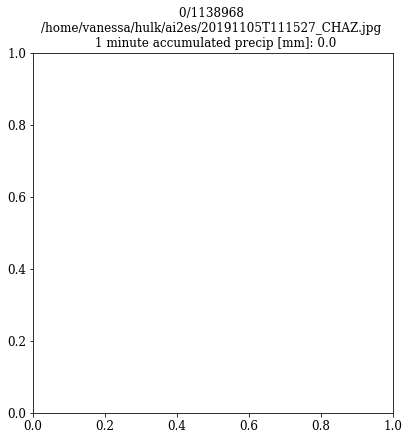

In [5]:
#TODO: change the path in df to /home/vanessa/hulk/ai2es so GUI runs
g = cocpit.gui_label.GUI(df['path'], folder_dest, df['precip_accum_1min [mm]'])
g.make_buttons()
g.align_buttons()
g.display_image()
box_layout = ipywidgets.Layout(
        display="flex", flex_flow="column", align_items="center", width="100%"
    )
image_box = ipywidgets.HBox([g.center])
display(ipywidgets.VBox([image_box, g.label_btns, g.undo_btn], layout=box_layout))

In [13]:
# output statistics on the training dataset
display = station_stats.main()
display

CLASS: precipitation
count     16677
unique      122
top        ANDE
freq       1494
Name: stids, dtype: object
CLASS: no precipitation
count     24929
unique      122
top        ADDI
freq       7034
Name: stids, dtype: object
CLASS: obstructed
count     2425
unique     119
top       ADDI
freq       143
Name: stids, dtype: object


,stnid,precip,no precip,obstructed
0,ADDI,523,7034,143
1,ANDE,1494,6990,59
2,BATA,95,79,8
3,BEAC,81,108,6
4,BELD,155,100,12
5,BELL,148,95,14
6,BELM,74,94,5
7,BERK,146,88,11
8,BING,142,83,16
9,BKLN,1,1,0


In [10]:
#pulling from this config
cocpit.config

<module 'cocpit.config' from '/home/vanessa/anaconda3/lib/python3.9/site-packages/cocpit-2.0.0-py3.9.egg/cocpit/config.py'>